In [ ]:
"""
Classification 
Apply Logistic Regression and Linear Discriminative Analysis (LDA) to a real-world application. You can create your own data or obtain it from internet resources. Implement the following operations:


Classification 
Apply Logistic Regression and Linear Discriminative Analysis to a real-world application. You can create your own data or obtain it from internet resources. Implement the following operations:
1.	Logistic Regression (30%)
a)	Apply Logistic Regression. 
b)	Calculate Standard error, Z-statistic and p-value for each coefficient. 
c)	Is there confounding variable?
d)	Apply Logistic regression with more than two classes (if any)


2.	Discriminative Analysis (30%)
a)	Apply Linear Discriminative Analysis.
b)	Define effective threshold for your model.
c)	Draw ROC curve.
d)	Apply Quadratic Discriminative Analysis (QDA).

3.	Apply Naïve Bayes algorithms (10%).

4.	Compare LR, LDA, QDA and NB (10%)
"""

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (roc_curve, roc_auc_score, auc, confusion_matrix, classification_report)
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [73]:
# dataset source: https://www.kaggle.com/datasets/deepaksaipendyala/credit-score-classification-processed
df = pd.read_csv("credit_score.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df = df[df['Credit_Score'] != 1]
df['Credit_Score'] = df['Credit_Score'].map({2: 0, 0: 1})
df['Credit_Score'].value_counts(normalize=True)
X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
df

(26134, 23) (11201, 23) (26134,) (11201,)


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,2,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,128,...,1,809.98,31.944960,0,1,49.574949,118.280222,3,284.629162,0
1,6,34.429817,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,128,...,1,809.98,28.609352,267,1,49.574949,81.699521,4,331.209863,0
2,0,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,128,...,1,809.98,31.377862,268,1,49.574949,199.458074,5,223.451310,0
3,7,23.000000,13,19114.12,1824.843333,3.0,4.0,3.000000,4.0,128,...,1,809.98,24.797347,269,1,49.574949,41.420153,1,341.489231,0
4,5,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,128,...,1,809.98,27.262259,270,1,49.574949,62.430172,6,340.479212,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79795,3,28.000000,1,20002.88,1929.906667,10.0,8.0,29.000000,5.0,4913,...,0,3571.70,22.895966,68,2,60.964772,43.370670,0,328.655224,1
79796,2,28.000000,1,20002.88,1929.906667,10.0,8.0,29.000000,5.0,4913,...,0,3571.70,39.772607,69,2,12112.000000,148.275233,5,273.750662,1
79797,6,28.000000,1,20002.88,1929.906667,10.0,8.0,29.000000,5.0,4913,...,0,3571.70,24.713861,70,2,60.964772,76.282793,5,345.743101,1
79802,5,25.000000,9,39628.99,3359.415833,4.0,6.0,14.546679,2.0,683,...,1,502.38,41.255522,380,1,35.104023,24.028477,0,516.809083,1


In [74]:
df['Credit_Score'].value_counts(normalize=True)
# Standard    0.53174
# Poor        0.28998
# Good        0.17828

Credit_Score
1    0.619499
0    0.380501
Name: proportion, dtype: float64

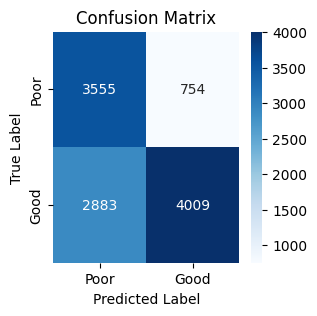

              precision    recall  f1-score   support

        Poor       0.55      0.83      0.66      4309
        Good       0.84      0.58      0.69      6892

    accuracy                           0.68     11201
   macro avg       0.70      0.70      0.67     11201
weighted avg       0.73      0.68      0.68     11201



In [75]:
class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
    
    def _sigmoid(self, z):
        """Sigmoid function with input clipping to prevent overflow."""
        # Clip z to prevent overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient Descent
        for _ in range(self.n_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(model)
            
            # Derivative of Loss w.r.t weights
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict_proba(self, X):
        """Predict probability scores"""
        model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(model)
    
    def predict(self, X, threshold=0.5):
        """Predict binary labels"""
        probabilities = self.predict_proba(X)
        return [1 if prob >= threshold else 0 for prob in probabilities]
    

# Now, we instantiate and train our logistic regression model
model = LogisticRegressionFromScratch(learning_rate=0.1, n_iterations=500)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


# Actual vs Predicted
y_true = y_test
y_pred = predictions

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Poor", "Good"], yticklabels=["Poor", "Good"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report
report = classification_report(y_true, y_pred, target_names=["Poor", "Good"])
print(report)


              precision    recall  f1-score   support

        Poor       0.77      0.86      0.81      4309
        Good       0.90      0.84      0.87      6892

    accuracy                           0.85     11201
   macro avg       0.84      0.85      0.84     11201
weighted avg       0.85      0.85      0.85     11201



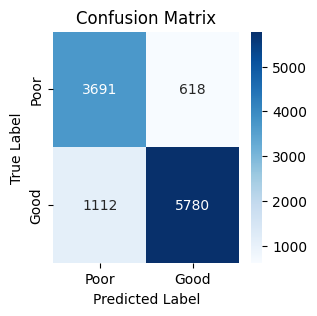

In [76]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_true = y_test
y_pred = y_pred

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Poor", "Good"], yticklabels=["Poor", "Good"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

report = classification_report(y_true, y_pred, target_names=["Poor", "Good"])
print(report)


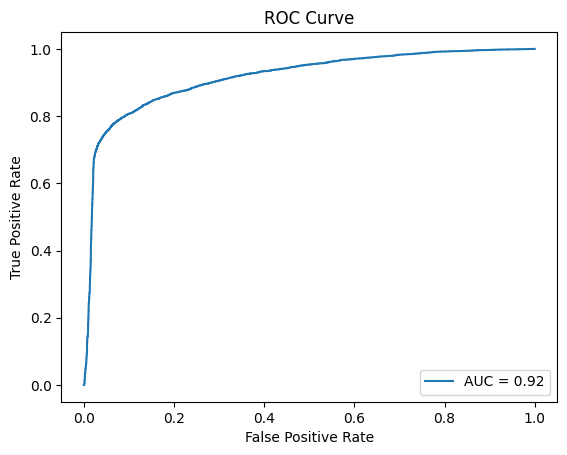

In [78]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [32]:
X_train = sm.add_constant(X_train)
model = sm.Logit(y_train, X_train)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.352075
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           Credit_Score   No. Observations:                26134
Model:                          Logit   Df Residuals:                    26110
Method:                           MLE   Df Model:                           23
Date:                Mon, 08 Apr 2024   Pseudo R-squ.:                  0.4693
Time:                        22:51:46   Log-Likelihood:                -9201.1
converged:                       True   LL-Null:                       -17338.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3370      0.028     47.808      0.000       1.282       1.392
x1             0.0320      0.

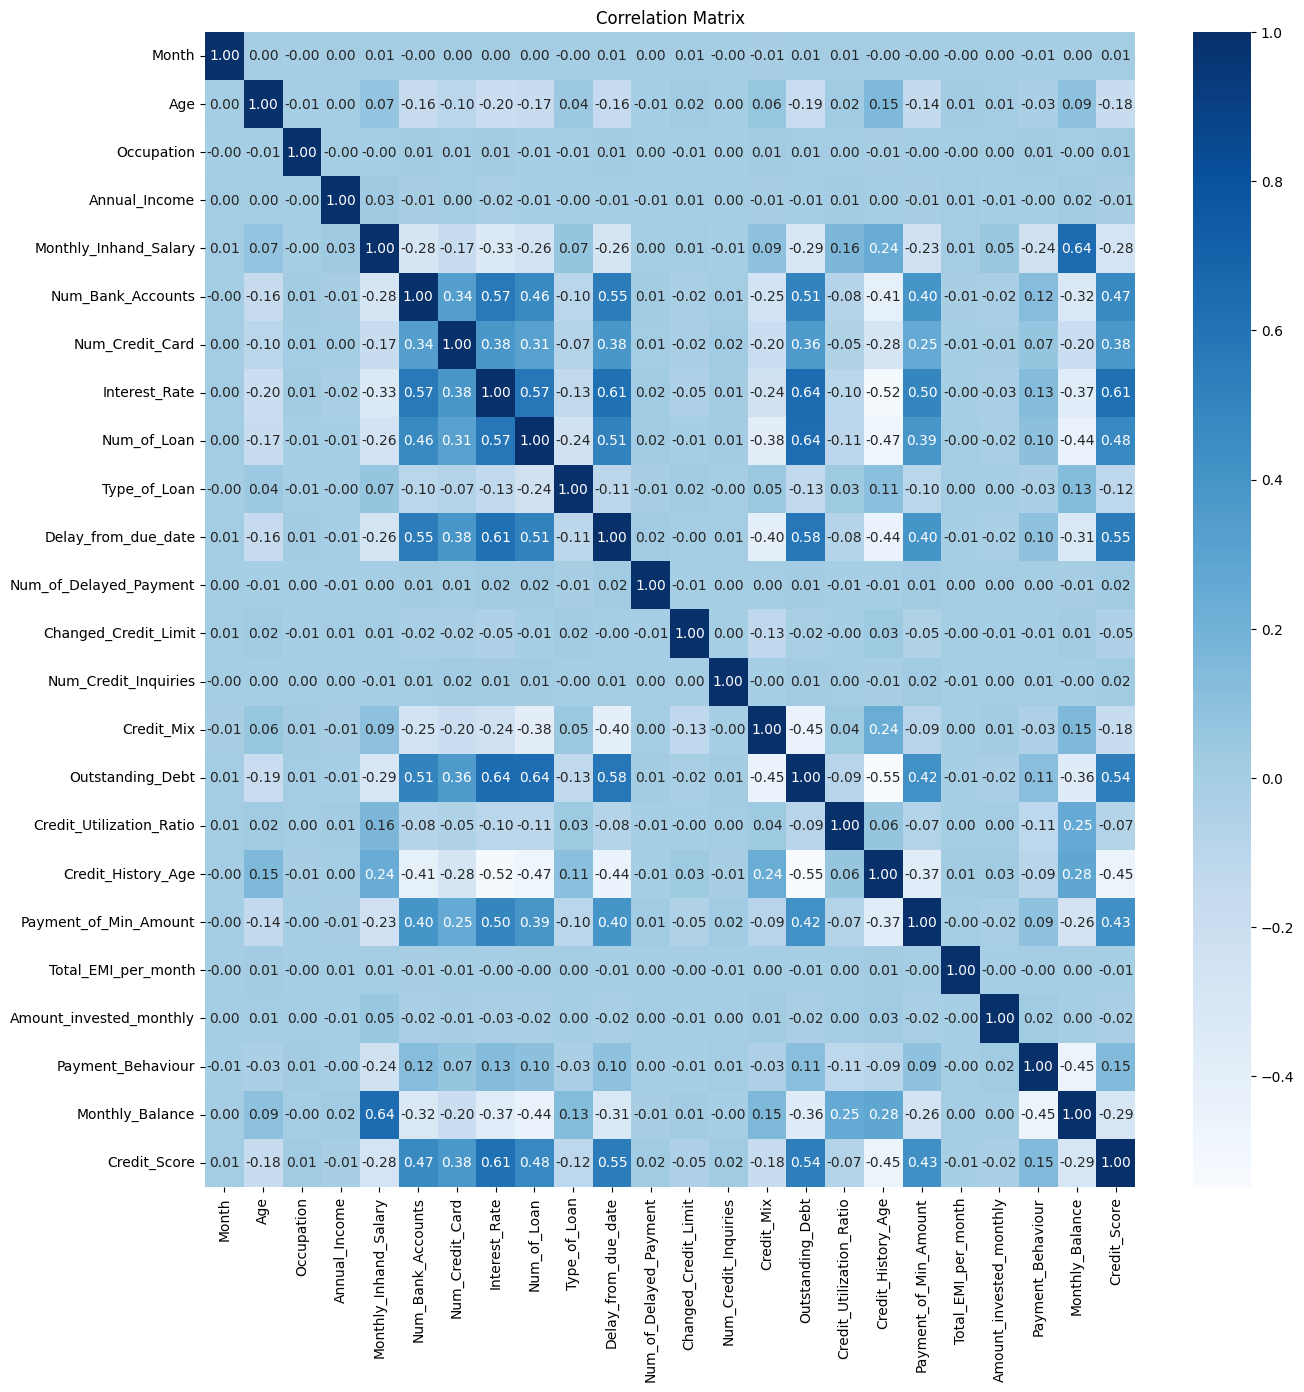

In [41]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Blues", annot_kws={"size": 10})
plt.title("Correlation Matrix")
plt.show()


In [79]:
correlated_features = set()
correlation_matrix = df.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)

{'Outstanding_Debt', 'Interest_Rate', 'Credit_History_Age', 'Delay_from_due_date', 'Credit_Score', 'Monthly_Balance', 'Num_of_Loan'}


In [46]:
corr_matrix = df.corr()
threshold = 0.6

target = 'Credit_Score'
significant_correlations_with_target = corr_matrix[target][corr_matrix[target].abs() > threshold].index.tolist()
significant_correlations_with_target.remove(target)

print("Features significantly correlated with the target variable:")
print(significant_correlations_with_target)

potential_confounders = {}
for feature in significant_correlations_with_target:
    correlated_features = corr_matrix[feature][corr_matrix[feature].abs() > threshold].index.tolist()
    correlated_features.remove(feature)
    potential_confounders[feature] = correlated_features

print("\nPotential confounders for each feature significantly correlated with the target:")
for feature, confounders in potential_confounders.items():
    print(f"{feature}: {confounders}")

Features significantly correlated with the target variable:
['Interest_Rate']

Potential confounders for each feature significantly correlated with the target:
Interest_Rate: ['Delay_from_due_date', 'Outstanding_Debt', 'Credit_Score']


In [58]:
df = pd.read_csv("credit_score.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)

X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.61      0.49      0.54      6992
           1       0.65      0.72      0.68     12731
           2       0.56      0.54      0.55      4219

    accuracy                           0.62     23942
   macro avg       0.60      0.58      0.59     23942
weighted avg       0.62      0.62      0.62     23942



In [66]:
# dataset source: https://www.kaggle.com/datasets/deepaksaipendyala/credit-score-classification-processed
df = pd.read_csv("credit_score.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df = df[df['Credit_Score'] != 1]
df['Credit_Score'] = df['Credit_Score'].map({2: 0, 0: 1})
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,2,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,128,...,1,809.98,31.944960,0,1,49.574949,118.280222,3,284.629162,0
1,6,34.429817,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,128,...,1,809.98,28.609352,267,1,49.574949,81.699521,4,331.209863,0
2,0,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,128,...,1,809.98,31.377862,268,1,49.574949,199.458074,5,223.451310,0
3,7,23.000000,13,19114.12,1824.843333,3.0,4.0,3.000000,4.0,128,...,1,809.98,24.797347,269,1,49.574949,41.420153,1,341.489231,0
4,5,23.000000,13,19114.12,4194.170850,3.0,4.0,3.000000,4.0,128,...,1,809.98,27.262259,270,1,49.574949,62.430172,6,340.479212,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79795,3,28.000000,1,20002.88,1929.906667,10.0,8.0,29.000000,5.0,4913,...,0,3571.70,22.895966,68,2,60.964772,43.370670,0,328.655224,1
79796,2,28.000000,1,20002.88,1929.906667,10.0,8.0,29.000000,5.0,4913,...,0,3571.70,39.772607,69,2,12112.000000,148.275233,5,273.750662,1
79797,6,28.000000,1,20002.88,1929.906667,10.0,8.0,29.000000,5.0,4913,...,0,3571.70,24.713861,70,2,60.964772,76.282793,5,345.743101,1
79802,5,25.000000,9,39628.99,3359.415833,4.0,6.0,14.546679,2.0,683,...,1,502.38,41.255522,380,1,35.104023,24.028477,0,516.809083,1


In [70]:
"""
2.	Discriminative Analysis (30%)
a)	Apply Linear Discriminative Analysis.
b)	Define effective threshold for your model. 0.5
c)	Draw ROC curve.
d)	Apply Quadratic Discriminative Analysis (QDA).

3.	Apply Naïve Bayes algorithms (10%).
"""

'\n2.\tDiscriminative Analysis (30%)\na)\tApply Linear Discriminative Analysis.\nb)\tDefine effective threshold for your model.\nc)\tDraw ROC curve.\nd)\tApply Quadratic Discriminative Analysis (QDA).\n\n3.\tApply Naïve Bayes algorithms (10%).\n'

In [80]:
X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Apply Linear Discriminant Analysis

Classification Report for Linear Discriminant Analysis:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81      4309
           1       0.92      0.81      0.86      6892

    accuracy                           0.84     11201
   macro avg       0.83      0.85      0.84     11201
weighted avg       0.85      0.84      0.84     11201



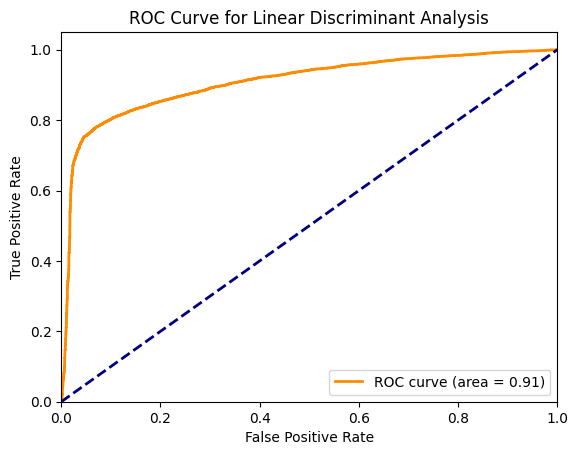

Confusion Matrix for Linear Discriminant Analysis:
[[3814  495]
 [1291 5601]]


In [83]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred_lda = lda.predict(X_test)
y_score_lda = lda.predict_proba(X_test)[:, 1]

print("Classification Report for Linear Discriminant Analysis:")
print(classification_report(y_test, y_pred_lda))

fpr_lda, tpr_lda, _ = roc_curve(y_test, y_score_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)

plt.figure()
lw = 2
plt.plot(fpr_lda, tpr_lda, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_lda)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Linear Discriminant Analysis')
plt.legend(loc="lower right")
plt.show()

conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
print("Confusion Matrix for Linear Discriminant Analysis:")
print(conf_matrix_lda)

## Apply Quadratic Discriminant Analysis


Classification Report for Quadratic Discriminant Analysis:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81      4309
           1       0.92      0.81      0.86      6892

    accuracy                           0.84     11201
   macro avg       0.83      0.85      0.84     11201
weighted avg       0.85      0.84      0.84     11201



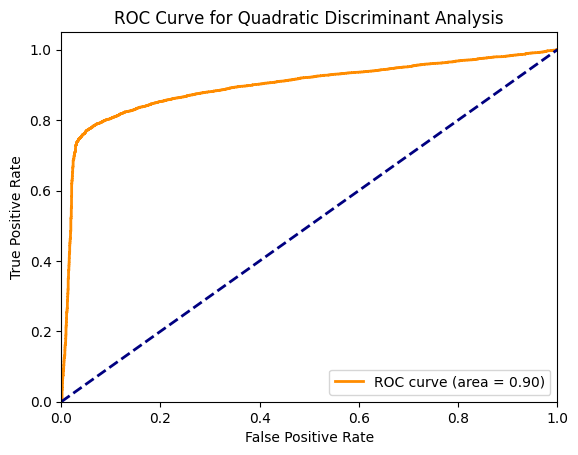


Confusion Matrix for Quadratic Discriminant Analysis:
[[3811  498]
 [1281 5611]]


In [82]:
threshold = 0.5

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

y_pred_qda = qda.predict(X_test)
y_score_qda = qda.predict_proba(X_test)[:, 1]

print("\nClassification Report for Quadratic Discriminant Analysis:")
print(classification_report(y_test, y_pred_qda))

fpr_qda, tpr_qda, _ = roc_curve(y_test, y_score_qda)
roc_auc_qda = auc(fpr_qda, tpr_qda)

plt.figure()
plt.plot(fpr_qda, tpr_qda, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_qda)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Quadratic Discriminant Analysis')
plt.legend(loc="lower right")
plt.show()

conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)
print("\nConfusion Matrix for Quadratic Discriminant Analysis:")
print(conf_matrix_qda)

## Apply Naïve Bayes


Classification Report for Naïve Bayes:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81      4309
           1       0.94      0.79      0.86      6892

    accuracy                           0.84     11201
   macro avg       0.83      0.85      0.83     11201
weighted avg       0.86      0.84      0.84     11201



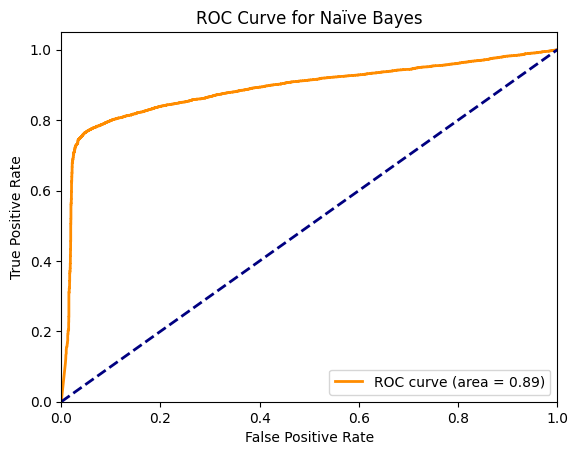


Confusion Matrix for Naïve Bayes:
[[3939  370]
 [1448 5444]]


In [85]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
y_score_nb = nb.predict_proba(X_test)[:, 1]

print("\nClassification Report for Naïve Bayes:")
print(classification_report(y_test, y_pred_nb))

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_score_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naïve Bayes')
plt.legend(loc="lower right")
plt.show()

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("\nConfusion Matrix for Naïve Bayes:")
print(conf_matrix_nb)